In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
%matplotlib inline

In [167]:
df = pd.read_csv('co2_mm_mlo.csv')
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [168]:
df.drop(['decimal date', 'deseasonalized', 'ndays', 'sdev', 'unc'], axis=1, inplace=True)

In [169]:
df.head()

,year,month,average
0,1958,3,315.70
1,1958,4,317.45
2,1958,5,317.51
3,1958,6,317.24
4,1958,7,315.86


In [170]:
df['day'] = 1
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

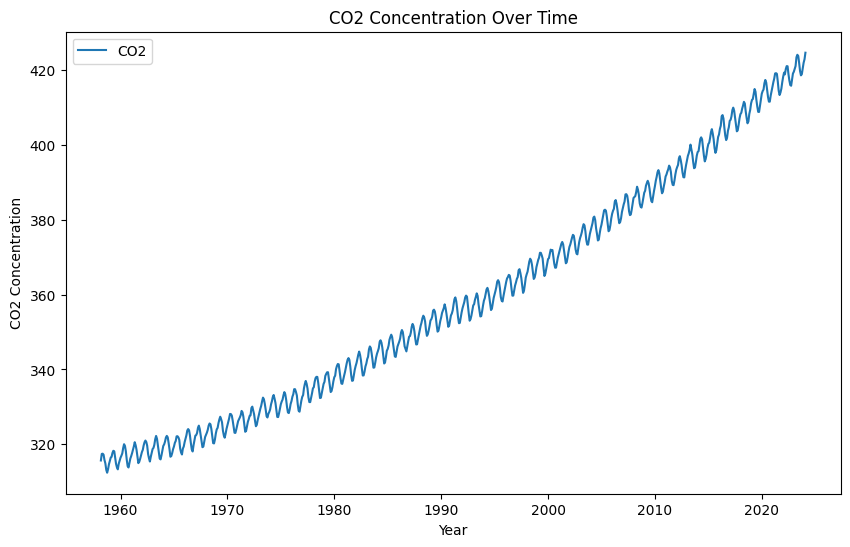

In [171]:
# Plot the data

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['average'], label='CO2')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

In [172]:
def create_sequence_dataset(data, k, t):
    features = []
    labels = []
    
    for i in range(len(data) - k - t + 1):
        features.append(data[i:i+k])
        labels.append(data[i+k:i+k+t])
    
    return features, labels

In [173]:
data_list = df['average'].tolist()
X, y = create_sequence_dataset(data_list, 3, 1)

In [174]:
X = np.array(X)
y = np.array(y)

In [175]:
X.shape, y.shape

((789, 3), (789, 1))

In [176]:
split = int(0.8 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((631, 3), (631, 1), (158, 3), (158, 1))

In [177]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train.shape, y_test.shape

((631,), (158,))

In [178]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=42, verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 60356.98780153
Iteration 2, loss = 60340.00826156
Iteration 3, loss = 60322.45798678
Iteration 4, loss = 60304.11849569
Iteration 5, loss = 60284.70278285
Iteration 6, loss = 60264.20515591
Iteration 7, loss = 60242.96412432
Iteration 8, loss = 60220.70061655
Iteration 9, loss = 60198.28391966
Iteration 10, loss = 60174.89093503
Iteration 11, loss = 60150.73223547
Iteration 12, loss = 60125.87297011
Iteration 13, loss = 60100.34858430
Iteration 14, loss = 60074.18129214
Iteration 15, loss = 60047.17696957
Iteration 16, loss = 60019.36974802
Iteration 17, loss = 59990.88901091
Iteration 18, loss = 59961.28673110
Iteration 19, loss = 59930.34444034
Iteration 20, loss = 59898.83947868
Iteration 21, loss = 59865.96908406
Iteration 22, loss = 59831.99541191
Iteration 23, loss = 59796.29199690
Iteration 24, loss = 59759.64839141
Iteration 25, loss = 59721.42001162
Iteration 26, loss = 59681.63173643
Iteration 27, loss = 59640.02838086
Iteration 28, loss = 59598.49923598
I

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000, random_state=42,
             verbose=True)

In [180]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_train)
mean_squared_error(y_train, y_pred)

0.8483815237375824

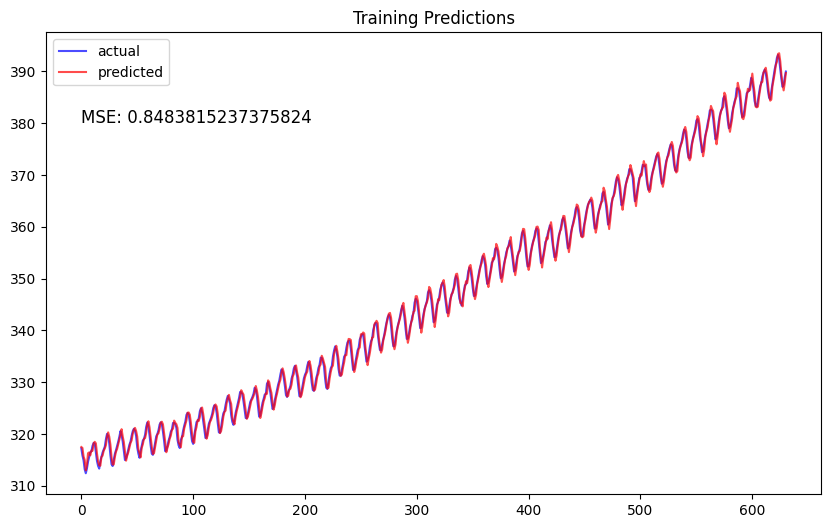

In [181]:
# Plot the training predictions, show proper contrast, use seaborn style, create attractive plot

plt.figure(figsize=(10, 6))
plt.plot(y_train, label='actual', color='b', alpha=0.7)
plt.plot(y_pred, label='predicted', color='r', alpha=0.7)
plt.text(0, 380, f'MSE: {mean_squared_error(y_train, y_pred)}', fontsize=12)
plt.title('Training Predictions')
plt.legend()
plt.show()

In [182]:
preds = model.predict(X_test)
mean_squared_error(y_test, preds)

1.4076550918510993

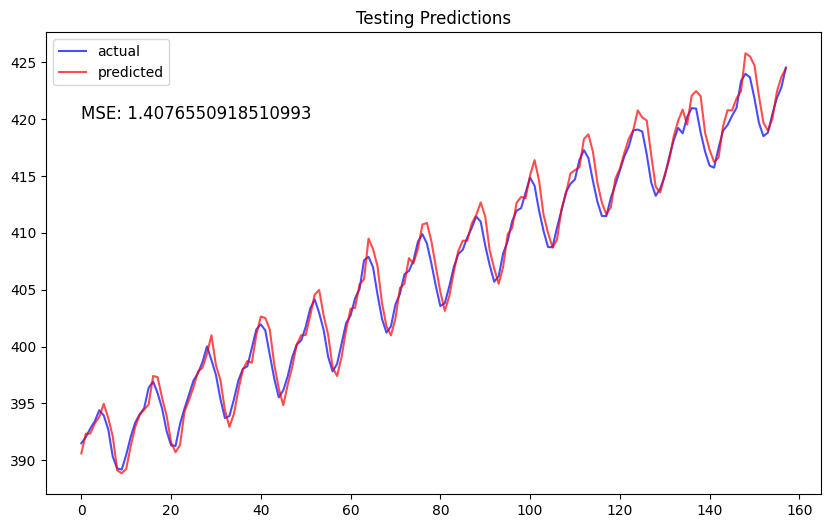

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='actual', color='b', alpha=0.7)
plt.plot(preds, label='predicted', color='r', alpha=0.7)
plt.text(0, 420, f'MSE: {mean_squared_error(y_test, preds)}', fontsize=12)
plt.title('Testing Predictions')
plt.legend()
plt.show()

In [185]:
X, y = create_sequence_dataset(data_list, 3, 1)
ma_pred = np.mean(X, axis=1)

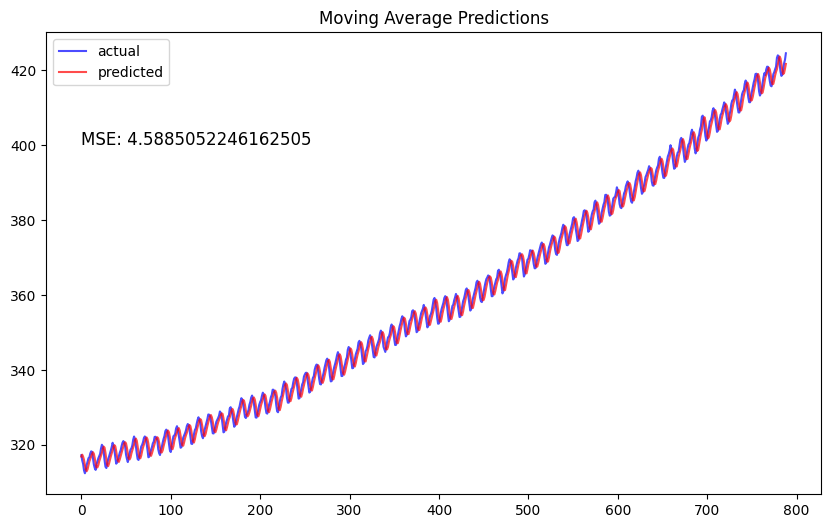

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(y, label='actual', color='b', alpha=0.7)
plt.plot(ma_pred, label='predicted', color='r', alpha=0.7)
plt.text(0, 400, f'MSE: {mean_squared_error(y, ma_pred)}', fontsize=12)
plt.title('Moving Average Predictions')
plt.legend()
plt.show()

In [187]:
data_list = df['average'].tolist()
train_list, test_list = data_list[:split], data_list[split:]

model = ARIMA(train_list, order=(3, 0, 0))
model_fit = model.fit()
preds = []
for i in range(len(test_list)):
    pred = model_fit.forecast(steps=1)
    preds.append(pred[0])
    model_fit = model_fit.append([test_list[i]])

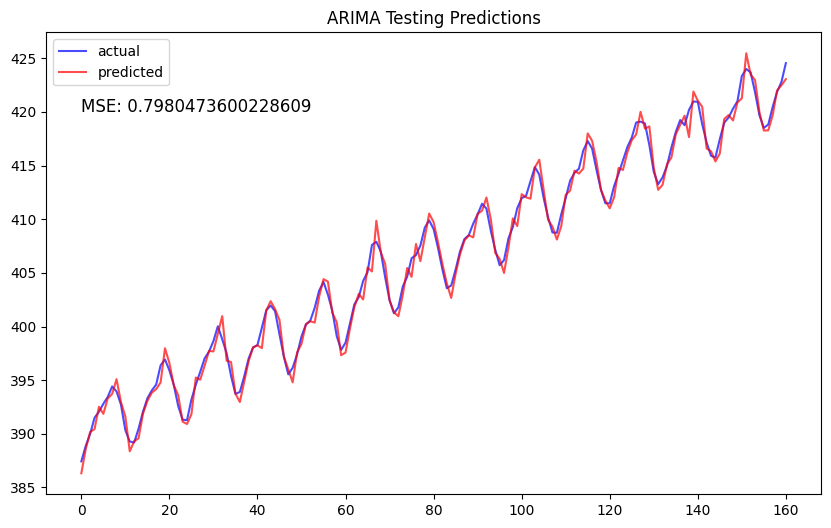

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(test_list, label='actual', color='b', alpha=0.7)
plt.plot(preds, label='predicted', color='r', alpha=0.7)
plt.text(0, 420, f'MSE: {mean_squared_error(test_list, preds)}', fontsize=12)
plt.title('ARIMA Testing Predictions')
plt.legend()
plt.show()